# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.info())


## Task 1

print(f'Coach Ticket Prices: Mean: {np.mean(flight['coach_price']):.2f}, Median: {np.median(flight['coach_price'])}, Mode: {stats.mode(flight['coach_price'])[0]}')
print(f'Coach Min and Max Prices: {np.min(flight['coach_price'])}, {np.max(flight['coach_price'])}')
q1 = np.percentile(flight['coach_price'], 25)
q3 = np.percentile(flight['coach_price'], 75)
iqr = q3 - q1
print(f'25th Percentile: {q1}\n75th Percentile: {q3}\nIQR: {iqr}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   miles                   129780 non-null  int64  
 1   passengers              129780 non-null  int64  
 2   delay                   129780 non-null  int64  
 3   inflight_meal           129780 non-null  object 
 4   inflight_entertainment  129780 non-null  object 
 5   inflight_wifi           129780 non-null  object 
 6   day_of_week             129780 non-null  object 
 7   redeye                  129780 non-null  object 
 8   weekend                 129780 non-null  object 
 9   coach_price             129780 non-null  float64
 10  firstclass_price        129780 non-null  float64
 11  hours                   129780 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 11.9+ MB
None
Coach Ticket Prices: Mean: 376.59, Median: 380.56, Mode: 361.53
C

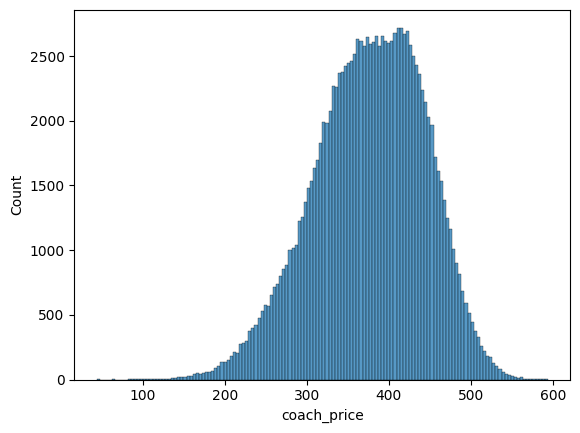

<Figure size 640x480 with 0 Axes>

In [2]:
sns.histplot(flight.coach_price)
plt.show()
plt.clf()

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

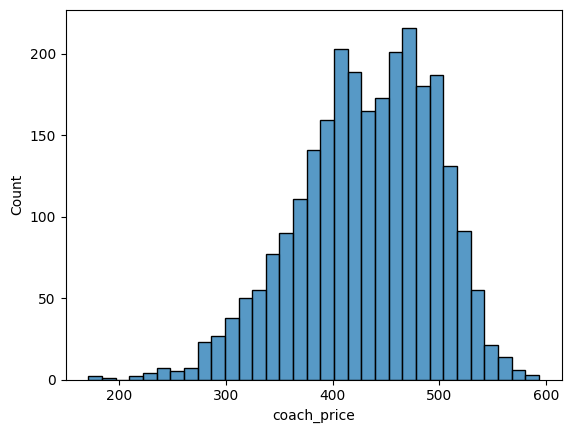

<Figure size 640x480 with 0 Axes>

In [3]:
## Task 2
sns.histplot(flight.coach_price[flight.hours >= 8])
plt.show()
plt.clf()


3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

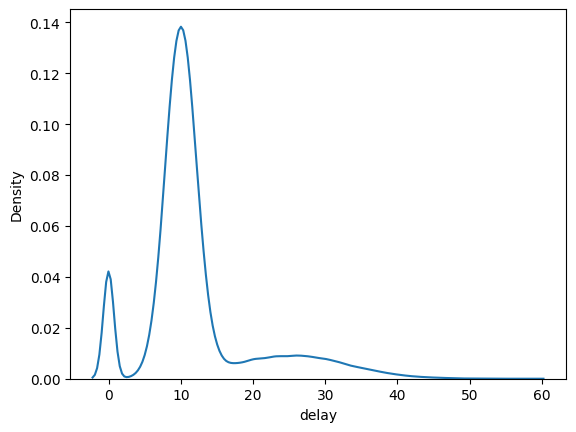

<Figure size 640x480 with 0 Axes>

In [9]:
## Task 3
sns.kdeplot(flight.delay[flight.delay <= 100])
plt.show()
plt.clf()


## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

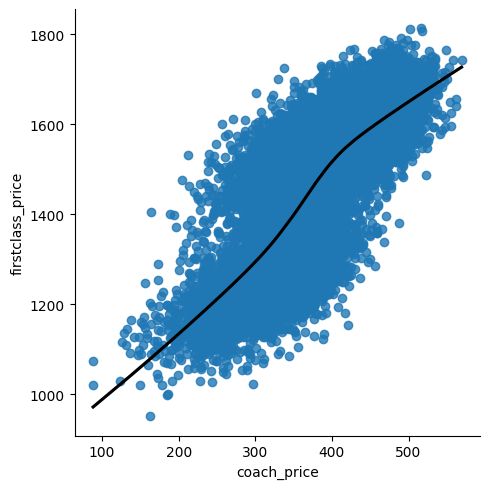

<Figure size 640x480 with 0 Axes>

In [18]:
## Task 4

## create a random sample from the very large data set
## setting our random sample to be 10% of the original
perc = 0.1

## flight.shape[0] gets the number of rows, multiplied
## by the 10% variable, which is all converted to an
## int. this int is then used to randomly sample that
## many records from the original dataframe and store
## it in a new dataframe
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

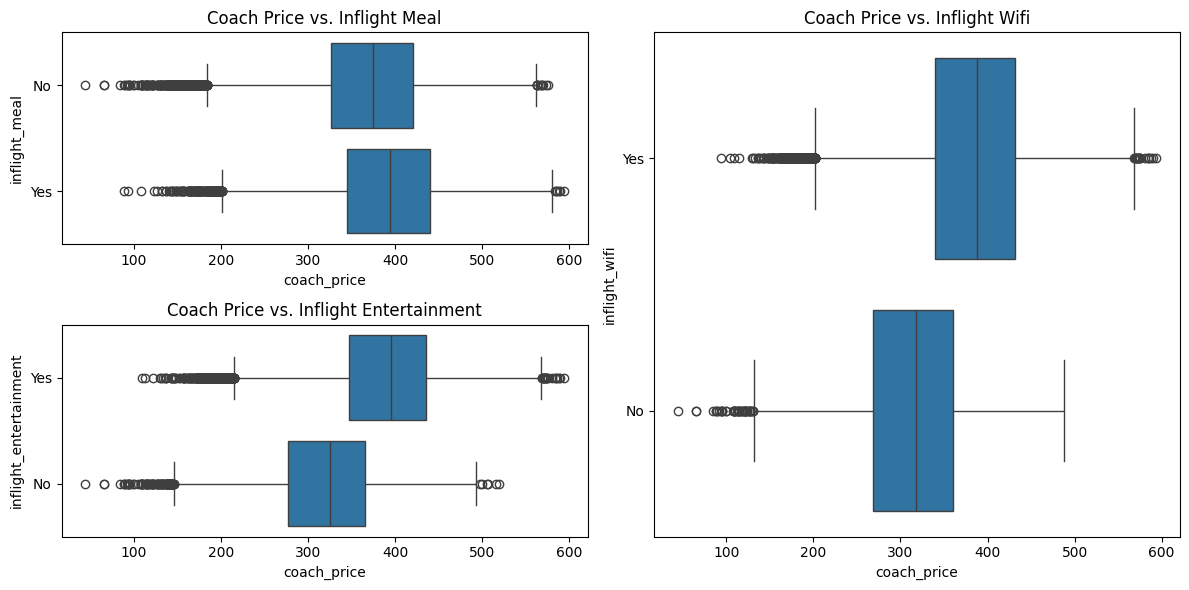

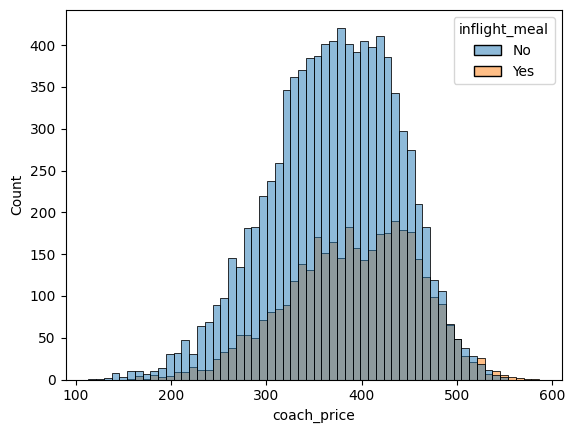

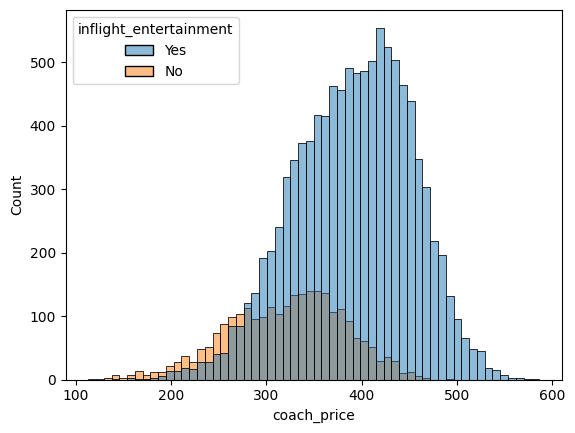

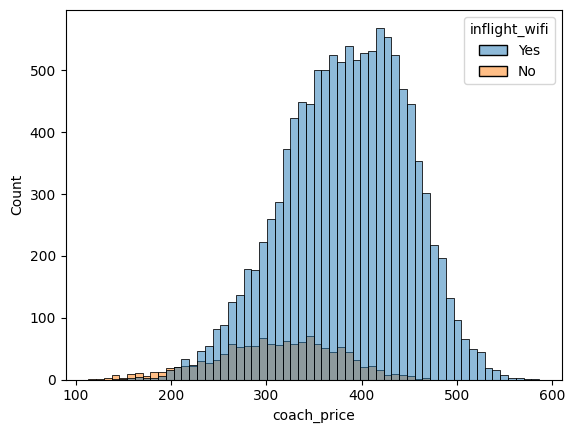

<Figure size 640x480 with 0 Axes>

In [44]:
## Task 5

plt.figure(figsize=(12, 6))  # Adjust figure size as needed

plt.subplot(2, 2, 1)
sns.boxplot(x='coach_price', y='inflight_meal', data=flight)
plt.title('Coach Price vs. Inflight Meal')

plt.subplot(2, 2, 3)
sns.boxplot(x='coach_price', y='inflight_entertainment', data=flight)
plt.title('Coach Price vs. Inflight Entertainment')

plt.subplot(1, 2, 2)
sns.boxplot(x='coach_price', y='inflight_wifi', data=flight)
plt.title('Coach Price vs. Inflight Wifi')


plt.tight_layout()
plt.show()

## create a random sample from the very large data set
## setting our random sample to be 10% of the original
perc = 0.1

## flight.shape[0] gets the number of rows, multiplied
## by the 10% variable, which is all converted to an
## int. this int is then used to randomly sample that
## many records from the original dataframe and store
## it in a new dataframe
flight_sub = flight.sample(n = int(flight.shape[0]*perc))


## their solution was using hisplots, which i think i like more
## but what if we took it a step further and used a sample?
## i think this makes the relationship between the variables
## more apparent

# Inflight Meals
sns.histplot(flight_sub, x = "coach_price", hue = flight.inflight_meal)
plt.show()
plt.clf()

# Inflight Entertainment
sns.histplot(flight_sub, x = "coach_price", hue = flight.inflight_entertainment)
plt.show()
plt.clf()

# Inflight WiFi
sns.histplot(flight_sub, x = "coach_price", hue = flight.inflight_wifi)
plt.show()
plt.clf()


6. How does the number of passengers change in relation to the length of flights?

In [7]:
## Task 6



## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

In [8]:
## Task 7



8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

In [9]:
## Task 8




